# HOMEWORK 2 - ADM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import methods
import datetime

## READ THE DATA

In [2]:
df_names = ["./datasets/2019-Nov.csv", "./datasets/2019-Oct.csv"]

## UNDERSTAND THE DATA 

The data that we handle for this homework come from an online store. We are going to analyze two months: October and November. For each month we have different features that we have described below: 

In [3]:
methods.describe_df(df_names)

Info for October
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB
None 

The total number of null values in each column is:
event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64 

Info for November
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0  

We notice that there are some null values, but these are only inside two specific columns: *category_code* and *brand*. Since, for each question, we decide which columns we needed to read to answer it, we decided to handle null values inside a specific question only in the cases where they were actually relevant. (If we do so it will be specified in the *methods.py* file)

# QUESTION 1
## Which is the rate of complete funnels?

First of all we read the DataFrame, importing only the columns that we need. In this particular case, for the subquestions 1.1-1.2-1.3 we just need *user_session*,*event_type* and *product_id*

In [5]:
df1 = methods.loadAllDatasets(df_names, ['user_session','event_type','product_id'])

While, for the subquestions 1.4 and 1.5 we need *user_session*,*event_type*, *product_id* and *event_time*. We also need to parse the last column so that it will be recognized as a date and not as a string

In [4]:
df2 = methods.loadAllDatasetsWithParser(df_names)

**RQ1.1** What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc)

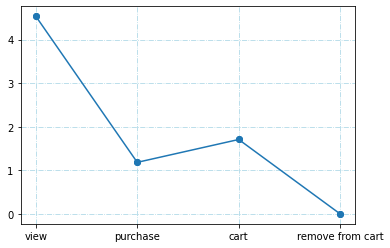

In [6]:
methods.avg_operations_performed(df1)

As we can notice in the graph above, in average, users tend to view products a lot, but, only in few occasions, the put them in the cart. Also, after one item is inside a cart is not garanteed to be purchased, in fact that operation has a lower average.

The event type *remove from cart* has an average of 0 beacuse in the months of October and November never happened.

<p>&nbsp;</p>

**RQ1.2** How many times, on average, a user views a product before adding it to the cart?

In [7]:
avg = methods.avg_views_before_cart(df1)
print(f"In average, a user views a product {avg} times before adding it to the cart.")

In average, a user views a product 1.874 times before adding it to the cart.


<p>&nbsp;</p>

**RQ1.3** What’s the probability that products added once to the cart are effectively bought?

In [9]:
avg = methods.avg_purchase_after_cart(df1)

In [11]:
print(f"The probability that products added once to the cart are effectively bought is: {avg}")

The probability that products added once to the cart are effectively bought is: 0.38


<p>&nbsp;</p>

**RQ1.4** What’s the average time an item stays in the cart before being removed?

In [ ]:
methods.avg_time_cart_before_removal(df2)

**!!** This function can not be runned if we take only into account October and November because, in these months the event remove_from_cart does not exists as we can see below:

In [13]:
df2.event_type.unique()

array(['view', 'purchase', 'cart'], dtype=object)

If we try and run it we will get an error since we are performing operations (in particular divisions) with an empty series.
<p>&nbsp;</p>

**RQ1.5** How much time passes on average between the first view time and a purchase/addition to cart?

In [4]:
avg = methods.avg_time_between_view_and_cart(df2)
print(f"The average time that passes between the first time that an item is viewed and the moment in which that item is added to the cart is: {round(avg,2)} mins")

,event_time_x,event_type_x,product_id,user_session,event_time_y,event_type_y,difference_times
0,2019-10-06 11:32:50+00:00,view,1004870,00000083-8816-4d58-a9b8-f52f54186edc,2019-10-06 11:33:54+00:00,cart,64
1,2019-10-25 08:32:40+00:00,view,1004834,000001fd-1f89-45e8-a3ce-fe3218cabfad,2019-10-25 08:34:23+00:00,cart,103
2,2019-11-15 05:13:17+00:00,view,6200260,00003d51-f077-4b44-a0cc-4e9282a439a1,2019-11-15 05:14:24+00:00,cart,67
3,2019-11-11 03:35:08+00:00,view,5100719,00003e3b-b365-4460-bf59-fcc0c1491c97,2019-11-11 03:35:11+00:00,cart,3
4,2019-11-15 05:34:04+00:00,view,12703050,000047aa-c8c4-408f-a37f-fc2f39a7728e,2019-11-15 05:34:20+00:00,cart,16
...,...,...,...,...,...,...,...
2670922,2019-11-25 10:51:31+00:00,view,22700127,fffff038-a8d6-4c8a-9bf3-afe71b52733a,2019-11-25 10:52:04+00:00,cart,33
2670923,2019-11-25 10:54:31+00:00,view,22700128,fffff038-a8d6-4c8a-9bf3-afe71b52733a,2019-11-25 10:55:22+00:00,cart,51
2670924,2019-11-17 05:38:10+00:00,view,12720089,fffff736-405e-485f-ac84-6a622ef44329,2019-11-17 05:38:12+00:00,cart,2
2670925,2019-11-17 05:44:01+00:00,view,30100076,fffff736-405e-485f-ac84-6a622ef44329,2019-11-17 05:50:41+00:00,cart,400


The average time that passes between the first time that an item is view and the moment in which that item is added to the cart is: 3.54 mins


<p>&nbsp;</p>

In [5]:
avg = methods.avg_time_between_view_and_purchase(df2)
print(f"The average time that passes between the first time that an item is viewed and the moment in which that item is purchased is: {round(avg,2)} mins")

,event_time_x,event_type_x,product_id,user_session,event_time_y,event_type_y,difference_times
0,2019-10-06 11:32:50+00:00,view,1004870,00000083-8816-4d58-a9b8-f52f54186edc,2019-10-06 11:34:30+00:00,purchase,100
1,2019-10-25 08:32:40+00:00,view,1004834,000001fd-1f89-45e8-a3ce-fe3218cabfad,2019-10-25 08:39:11+00:00,purchase,391
2,2019-11-02 08:31:10+00:00,view,17302616,0000145a-b981-424b-ba76-5e8f50beb12d,2019-11-02 08:35:35+00:00,purchase,265
3,2019-11-11 03:35:08+00:00,view,5100719,00003e3b-b365-4460-bf59-fcc0c1491c97,2019-11-11 03:35:34+00:00,purchase,26
4,2019-10-17 13:34:16+00:00,view,1005031,00004ada-8f93-49a6-956d-4ed71ae94791,2019-10-17 13:35:24+00:00,purchase,68
...,...,...,...,...,...,...,...
1536928,2019-11-25 10:51:31+00:00,view,22700127,fffff038-a8d6-4c8a-9bf3-afe71b52733a,2019-11-25 10:53:28+00:00,purchase,117
1536929,2019-11-25 10:54:31+00:00,view,22700128,fffff038-a8d6-4c8a-9bf3-afe71b52733a,2019-11-25 10:56:59+00:00,purchase,148
1536930,2019-11-17 05:38:10+00:00,view,12720089,fffff736-405e-485f-ac84-6a622ef44329,2019-11-17 05:40:56+00:00,purchase,166
1536931,2019-11-17 05:44:01+00:00,view,30100076,fffff736-405e-485f-ac84-6a622ef44329,2019-11-17 05:52:00+00:00,purchase,479


The average time that passes between the first time that an item is view and the moment in which that item is purchased is: 4.95 mins


<p>&nbsp;</p>

So, to answer the main question: we noticed that users tend to view a product an average of 1.874 times before adding it to the cart. Once an item is added to the cart, it is not garanteed to be purchased, in fact only with probability 0.38 this happens. The rest of the times the item just stays in the cart and it could expire (removed automatically) or is removed from it manually by the user.
In conclusion the rate of complete funnels, which is given by completed operations (from view to purchase) over number of total oprations is low.

# QUESTION 2

**RQ2.1** What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.

Before to execute our functions we import our datasets and select the useful columns: ***'category_code', 'event_type', 'product_id'***.

This operation is made because the csv files are heavy to load and use. Also because we will use the same dataset with the <ins>same columns</ins>

In [10]:
#import november dataset
ndt_selection = methods.loadOneDataset(df_names[0], ['category_code', 'event_type', 'product_id'])

We imported also the october dataset

In [11]:
#import october dataset
odt_selection = methods.loadOneDataset(df_names[1], ['category_code', 'event_type', 'product_id'])

To obtain our score we restrict the dataset to the "event_type" column, in our case equal to "purchase".

# ***NOVEMBER***

In [12]:
#plot the categories of the most trending products overall
ndt_select = methods.restrict_dt(ndt_selection, "purchase", 10)

Show the plot that we want for this question.

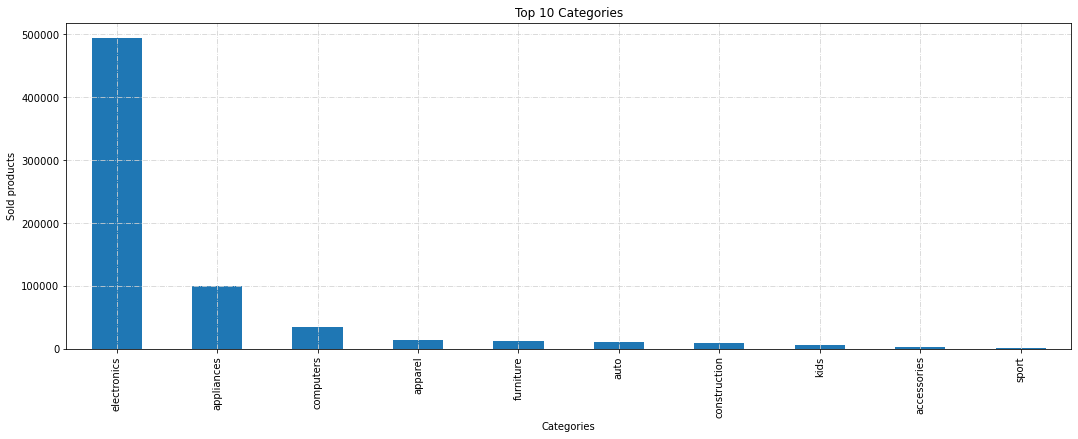

In [13]:
methods.plot_n_categories(ndt_select)

We see that the category **electronics** is the most sold.

# ***OCTOBER***

In [14]:
#plot the categories of the most trending products overall
odt_select = methods.restrict_dt(odt_selection, "purchase", 10)

Show the plot that we want for this question.

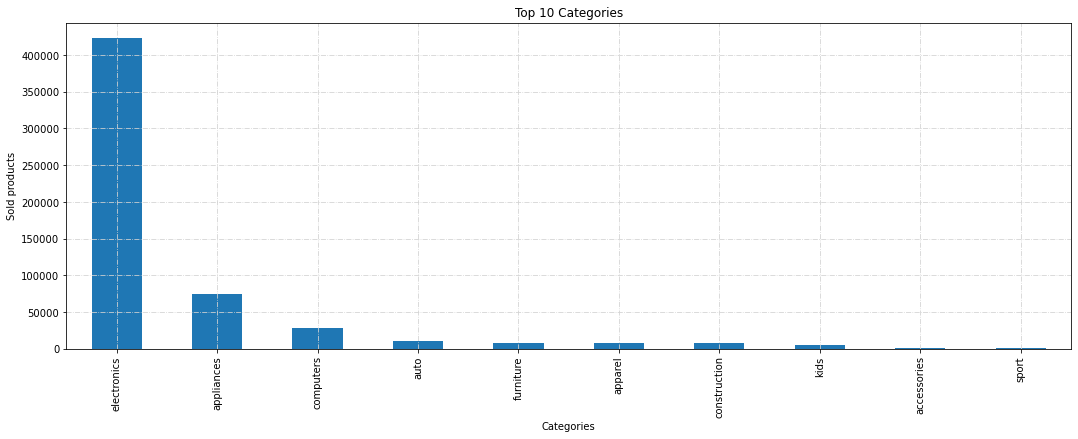

In [15]:
methods.plot_n_categories(odt_select)

We see that the category **electronics** is the most sold.

<p>&nbsp;</p>

**RQ2.2** Plot the most visited subcategories.

In this way, we display the subcategories and do the same thing that we saw in the last question.

# ***NOVEMBER***

In [16]:
#plot the most visited 30 subcategories
sub_ndf = methods.dt_subcategories(ndt_selection)

Show the plot that we want for this question.

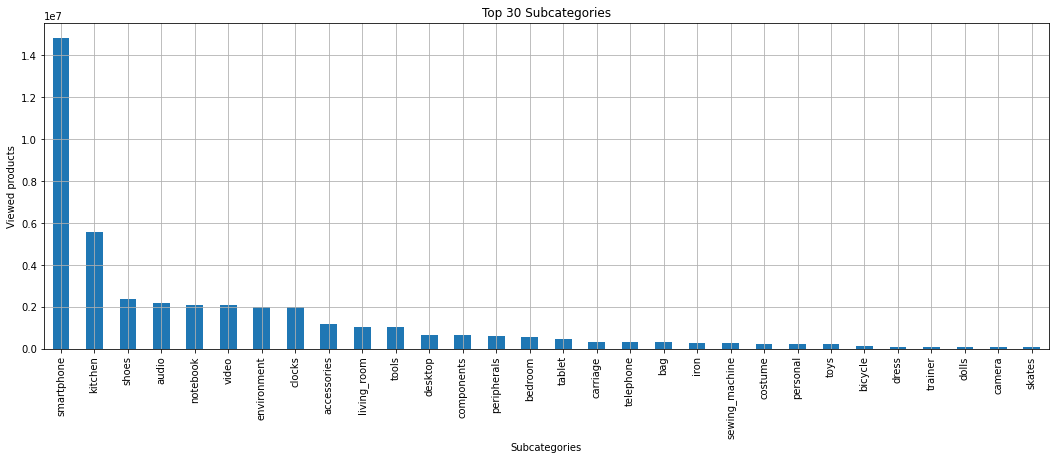

In [17]:
methods.plot_n_subcategories(sub_ndf, 30)

In this plot we see that the **smartphone** subcategory is the most sold in November.

<p>&nbsp;</p>

# ***OCTOBER***

In [18]:
#plot the most visited 30 subcategories
sub_odf = methods.dt_subcategories(odt_selection)

Show the plot that we want for this question.

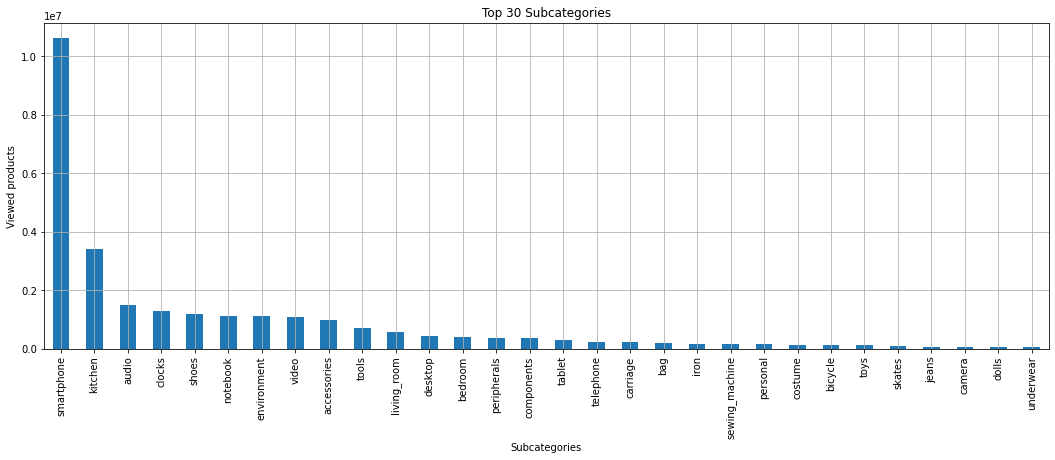

In [19]:
methods.plot_n_subcategories(sub_odf, 30)

In this plot we see that the **smartphone** subcategory is the most sold in October.

<p>&nbsp;</p>

**RQ2.3** What are the 10 most sold products per category?

# ***NOVEMBER***

For each category print 10 most sold products, but in order to have a good visualization we prefer printing only the first five categories.

In [20]:
#the 10 most sold products per category
methods.most_sold_products_per_category(sub_ndf, 10)

The category accessories has:
product_id
18300021    53
28401112    48
18300155    42
18300460    38
28400759    36
18300141    27
28400912    24
28401075    23
18300214    23
18300076    20
Name: category_code, dtype: int64
The category apparel has:
product_id
28720716    98
54900013    89
28716978    74
54900004    74
28719635    69
28716666    65
28719606    64
28716519    64
28719076    59
28713229    58
Name: category_code, dtype: int64
The category appliances has:
product_id
3700926    1764
3600661    1742
3601405    1140
3600666    1131
2900958     903
3700766     895
3601603     895
3600163     879
2702277     675
3701134     624
Name: category_code, dtype: int64
The category auto has:
product_id
6000094    1100
6000227     489
4700478     483
5701166     274
6000004     274
6000229     253
5701128     246
5701002     244
6000157     211
5701086     182
Name: category_code, dtype: int64
The category computers has:
product_id
1307310    1329
1307545     879
1307188     829
13070

# ***OCTOBER***

For each category print 10 most sold products, but in order to have a good visualization we prefer printing only the first five categories.

In [21]:
#the 10 most sold products per category
methods.most_sold_products_per_category(sub_odf, 10)

The category accessories has:
product_id
18300155    63
18300021    34
52900016    31
28300780    24
49800017    23
28300432    21
18300595    17
28400774    16
18300496    16
18300214    16
Name: category_code, dtype: int64
The category apparel has:
product_id
28718083    72
28715756    46
28712682    45
28715827    40
28717034    39
28715757    39
28715829    38
28716983    38
28703609    38
54900011    37
Name: category_code, dtype: int64
The category appliances has:
product_id
3700926    1675
3600661    1482
3600163    1017
3600666     877
2900536     831
3601405     768
3601485     627
2701657     566
3601244     559
3701134     543
Name: category_code, dtype: int64
The category auto has:
product_id
6000094    785
4700478    411
5701128    382
6000227    360
5701166    304
4700630    300
4700589    235
6000229    214
6000004    206
5700518    165
Name: category_code, dtype: int64
The category computers has:
product_id
1307310    1003
1307073     864
1307366     722
1307067     651

# QUESTION 3
## For each category, what’s the brand whose prices are higher on average?

To answer these questions we only need the columns 'category_code','brand','price'. For this reason we decided to read only these 3 when uploading the dataframes

In [16]:
df3 = methods.loadAllDatasets(df_names, ['category_code','price','brand'])

<p>&nbsp;</p>

**RQ3.1** Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

First thing first, we apply a function that chooses randomly one category_code from all the ones available

In [17]:
category = methods.choose_category(df3)
category

'apparel.shirt'

Now that we have our category, we call a functions thar shows the average price of the products sold by each brand inside it

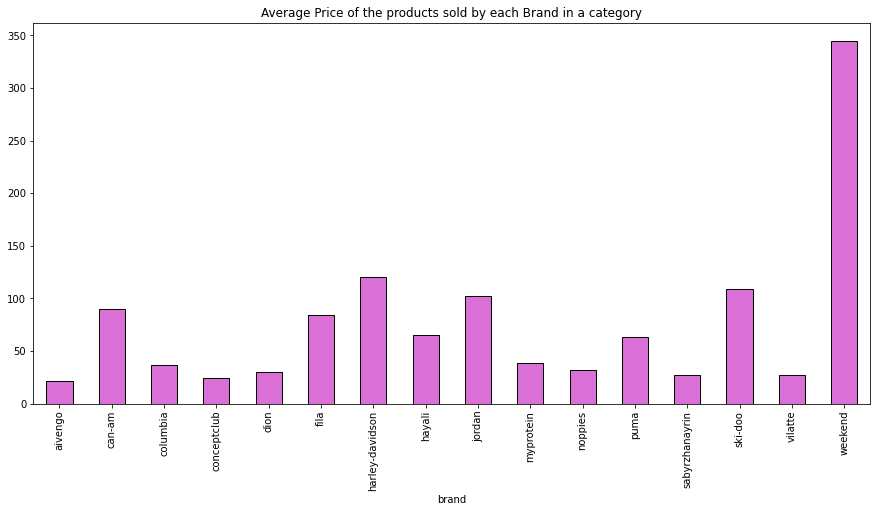

In [18]:
methods.avg_price(category, df3)

So, for example, if we select the category code **apparel.shirt**, there are several brands that offers it. Among all of those, the one that, in average, offers products with a higher price, is **weekend**
<p>&nbsp;</p>

**RQ3.2** Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [19]:
methods.highest_avg_price(df3) 

,0,1,2
0,construction.tools.soldering,zubr,19.709
1,auto.accessories.anti_freeze,ravenol,20.306
2,apparel.shoes.espadrilles,rieker,22.650
3,apparel.scarf,fabretti,23.953
4,accessories.umbrella,hoco,25.710
...,...,...,...
124,appliances.kitchen.refrigerators,climadiff,2261.951
125,sport.ski,kessler,2372.000
126,sport.trainer,nordictrack,2522.590
127,sport.bicycle,pinarello,2533.238


The Data Frame in output has 3 different columns:
- **0**: is representing the **category_code**
- **1**: is representing the **brand** with the highest average price in that specific category code
- **2**: is representing the **price** associated with that specific brand

So, for example, inside the category *accessories.umbrellas*, we can see that the highest price in averege is offered by *hoco* (25,71$), and this category is the fifth cheapest af all.
The results are also sorted so that the prices are in order from the smallest to the largest value.
<p>&nbsp;</p>

# QUESTION 4

***How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit.***

Before starting with the homework request, we pick a brand name by input for showing its profit for each month

In [1]:
#which brand do you want to search.. randomize the choice!
brand_to_search = input("Choose a brand to see its profit: ")

Choose a brand to see its profit: apple


Before to execute our functions import our datasets and we select the useful columns: ***'event_type', 'brand', 'price'***.

This operation is made because the csv files are heavy to load and use. Also because we will use the same dataset with the <ins>same columns</ins>

In [4]:
#import november dataset
ndt_selection = methods.loadOneDataset(df_names[0], ['event_type', 'brand', 'price'])

We imported also the october dataset

In [5]:
#import october dataset
odt_selection = methods.loadOneDataset(df_names[1], ['event_type', 'brand', 'price'])

To obtain our score we restrict the dataset to the "event_type" column, in our case equal to "purchase" compare also with the brand_to_search.

# ***NOVEMBER***

In [6]:
#how much does each brand earn per month?
new_ndt_sum = methods.restrict_bypurchase_brand(ndt_selection, brand_to_search)

How much is the profit of your brand?

In [7]:
print(f"The {brand_to_search} has a profit of: {new_ndt_sum}$")

The apple has a profit of: 127512524$


# ***OCTOBER***

In [8]:
#how much does each brand earn per month?
new_oct_sum = methods.restrict_bypurchase_brand(odt_selection, brand_to_search)

How much is the profit of your brand?

In [9]:
print(f"The {brand_to_search} has a profit of: {new_oct_sum}$")

The apple has a profit of: 111209268$


***Is the average price of products of different brands significantly different?*** We will see...

# ***NOVEMBER***

In [10]:
#see the average for each brand, is significant?
new_ndt_mean = methods.restrict_bypurchase_brand_avg(ndt_selection)
new_ndt_mean

brand
a-case                8.599149
a-elita               8.490000
a-mega               75.723333
aardwolf             31.300000
absolutechampion    166.030000
                       ...    
zotac               272.305714
zte                  79.501161
zubr                 89.318436
zuru                 12.840000
zvezda               11.970000
Name: price, Length: 2486, dtype: float64

# ***OCTOBER***

In [11]:
#see the average for each brand, is significant?
new_odt_mean = methods.restrict_bypurchase_brand_avg(odt_selection)
new_odt_mean

brand
a-case       4.745862
a-derma     12.360000
a-mega     114.607778
abk         11.560000
abtoys      46.310000
              ...    
zoom       167.310000
zotac       69.857500
zte         78.750694
zubr        47.075000
zuru        12.840000
Name: price, Length: 1983, dtype: float64

<span style="color:red"> ***We can say that the brand name is significant for the product type (it's obvious).*** </span>

<p>&nbsp;</p>

**RQ4.1** Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [12]:
biggest_lose = methods.big_lose(ndt_selection, odt_selection)

Now we plot the top 3 brands that have suffered the biggest losses in earnings between october and november.

In [13]:
methods.summarize(biggest_lose)

The brand jonnesway has lose the 2862 % between october and november
The brand sunfull has lose the 2399 % between october and november
The brand evga has lose the 2338 % between october and november


<p>&nbsp;</p>

# QUESTION 5

##  In what part of the day is your store most visited?

To answer the question, we only need to import two columns: *event_type* and *even_time*. We also need to parse the dates

In [3]:
df5 = methods.import_dataset5(df_names)

Now we can start analyzing our data. We can create different plots that show the most visited time of the day and the most visited day of the week

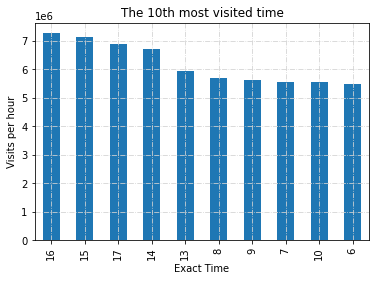

In [4]:
methods.most_visited_time(df5)

In this first plot we notice that usually people are more active it the afternoon, in fact the three most visited times of the day are the ones from 3PM to 5PM

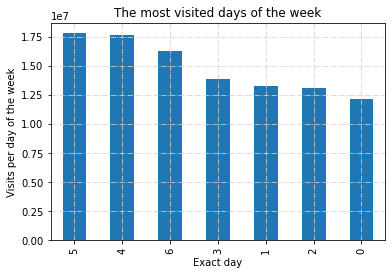

In [5]:
methods.most_visited_day(df5)

In this second analysis we noticed that over all the days of the week **Friday** and **Saturday** are the one with more views 

*Notice that on the x-axis the day of the week are indicated by numbers from 0 to 6; where 0 corresponds to Monday and 6 to Sunday*.

<p>&nbsp;</p>

Now we can 'merge' the two results and see, for each day of the week the average views of our online store splitted by hour.

**RQ5.1** Create a plot that for each day of the week show the hourly average of visitors your store has.

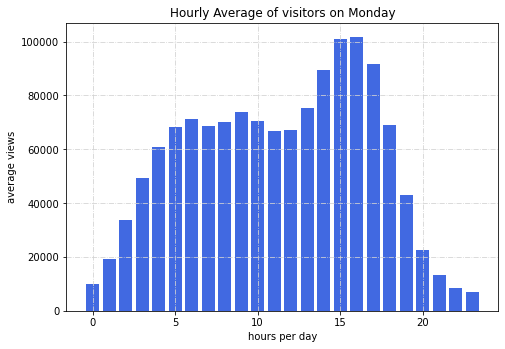

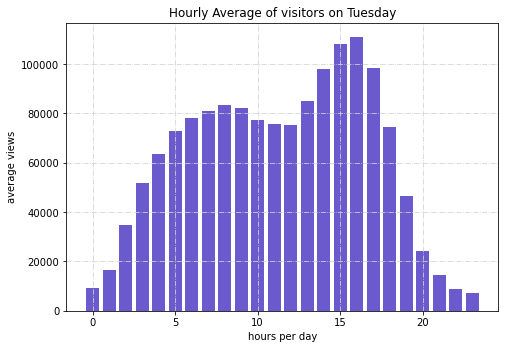

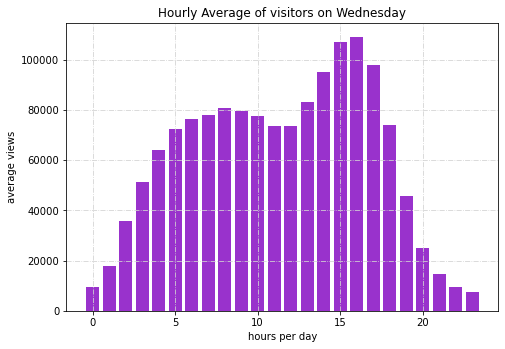

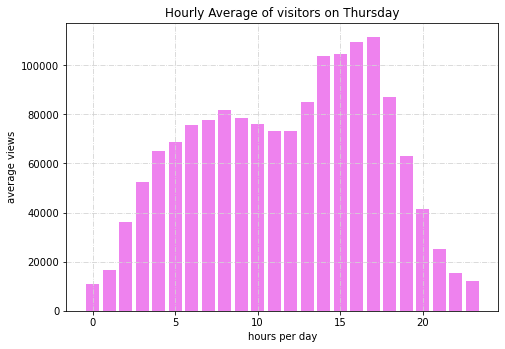

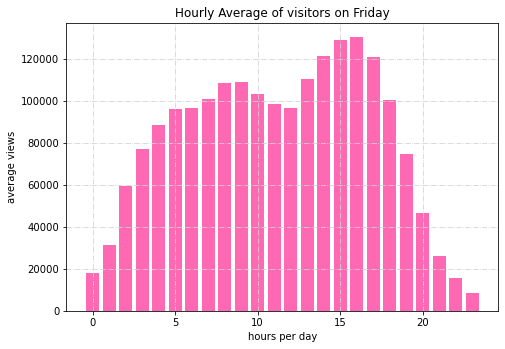

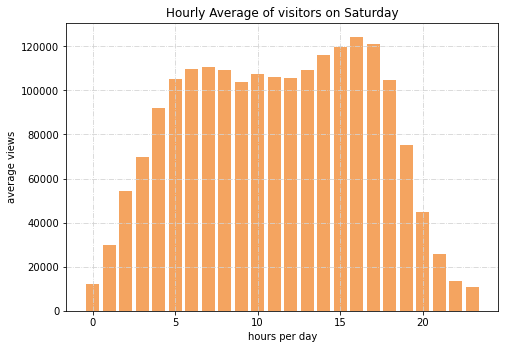

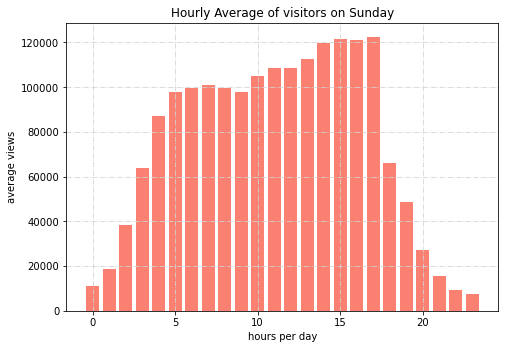

In [6]:
methods.avg_visitors_perday(df5)

**Comment:** we can see how, on average, the hours of the day where the store is most visited are between 3pm and 5pm. This is valid for every day of the week. We can also notice that the graph follows pretty much the same shape during all week: the views start increasing quickly from midnight untill there is a 'plateau' for some hours (5am - 1pm). From 1pm there is a peak in the early afternoon that ends with a drastic drop of view at around 6pm that continues untill 12pm where we have the lowest values.

**To answer the question**, we suggest to invest in ads and othere marketing strategies in the early hours of the afternoon in each day, because, as the graphics suggests, those are the hours with the most affluence.

# QUESTION 6

***What's the conversion rate of your online store?***

First of all... What is the conversion rate? 

**Conversion rate** of a product is given by the <ins>purchase</ins> rate over the number of times the product has been visited.

...and what is the purchase rate? 

**Purchase rate** is the proportion of purchases versus a base metric such as users, sessions, email subscribers, etc. with a generic formula being PR = P/N where P is the number of purchases and N is the number of events during which a conversion could have occurred.

In [22]:
purchase_rate = methods.purchase_rate(df_names)

now we calculate the conversion rate

**RQ6.1** Find the overall conversion rate of your store.

In [23]:
conversion_rate = methods.conversion_rate(purchase_rate, df_names)
conversion_rate

0.00795408972414176

The value returned is a good value to understand what is going on in our online store.. this is pretty low..

**RQ6.2** Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

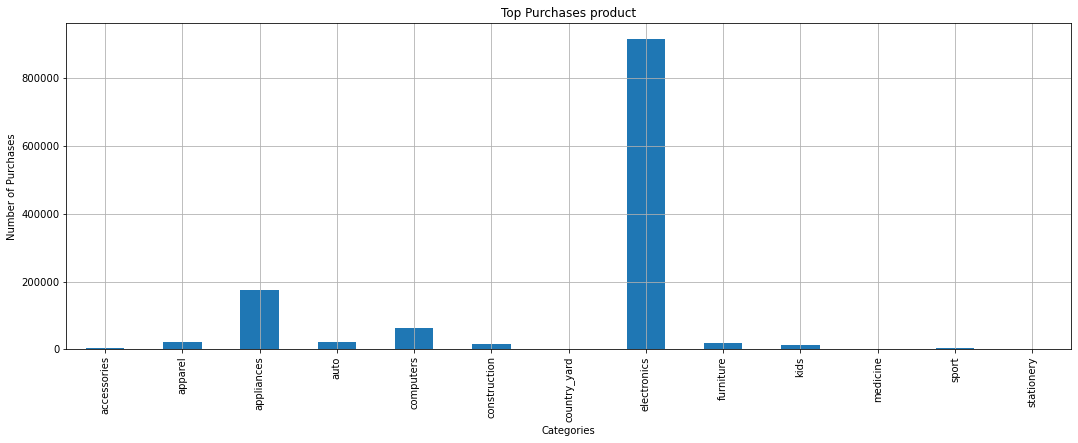

In [24]:
purchase_dt = methods.percategory_show_purchases(df_names)

Now we will prepare our conversion rate per each category. 

We want to have the number of categories, then we will make the conversion rate.

In [25]:
eachcategory_num = methods.number_categories(df_names)
eachcategory_num

category_code
accessories.bag         505378
accessories.umbrella      8912
accessories.wallet      113986
apparel.belt              7167
apparel.costume         380291
                         ...  
sport.ski                19759
sport.snowboard          21689
sport.tennis             11285
sport.trainer           132787
stationery.cartrige      20398
Name: user_session, Length: 129, dtype: int64

the conversion rate is for each category in **decreasing** oder

In [26]:
cvrate = methods.conversion_rate_percategory(df_names, eachcategory_num)
cvrate

category_code
kids.fmcg.diapers                0.027530
electronics.smartphone           0.025847
electronics.audio.headphone      0.024455
appliances.kitchen.microwave     0.018461
appliances.personal.scales       0.018141
                                   ...   
construction.tools.soldering     0.001684
apparel.shoes.slipons            0.001505
country_yard.furniture.hammok    0.001425
apparel.skirt                    0.001419
apparel.dress                    0.000949
Length: 127, dtype: float64

we can say that there are lower purchase rates presented in our online store

# QUESTION 7

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
**Prove that the pareto principle applies to your store.**

To answer this question we first have to import only the columns of the concatenated dataset that we need. In this case those are: *event_type*, *user_id*, *price* and *product_id*

In [4]:
df7 = fn.read_data(df_names)

Now we can calculate the total profits of our store given from all the purchases made by all the users in two months. We also compute the 80% of them

In [5]:
purchases = df7[df7.event_type=='purchase'].price.sum()
pur_80 = .8*purchases
print(f'80% of the profit corresponds to {round(pur_80,2)}$')

80% of the profit corresponds to 404121914.22$


We can now calculate how much the top 20% of the users (the ones that spent the most) spent during the whole months of October and November

In [6]:
profit_from_top_users = fn.proof_pareto_principle(df7)

,tot_sales
user_id,
512386086,344153.29
515384420,303144.24
513117637,266331.24
519267944,265569.52
518514099,203986.07
...,...
567111546,860.41
546982605,860.41
537925505,860.38


In [7]:
print(f'20% of the top users spend {profit_from_top_users}$')

20% of the top users spend 364222233.81$


As we can see, the two results are really close. 

This proves the Pareto Principle that states, in fact, how usually 80% of the profits for a store, come from 20% of the users